In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

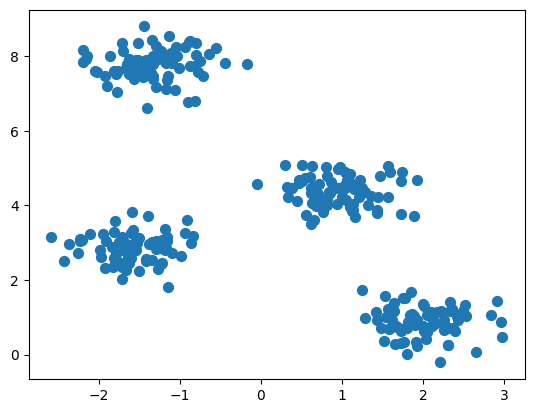

In [30]:
from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300,centers=4,cluster_std=0.40,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)
plt.show()

In [31]:
print(X)

[[ 1.24299373e+00  1.72346080e+00]
 [-1.35852399e+00  7.55156883e+00]
 [ 1.09556535e+00  4.83434169e+00]
 [-1.09516280e+00  7.82176310e+00]
 [ 1.53265678e+00  1.56091593e+00]
 [ 2.97683420e+00  4.73657331e-01]
 [-1.71444969e+00  2.03730575e+00]
 [ 1.26790630e+00  4.35538049e+00]
 [-5.52706704e-01  8.23321777e+00]
 [-8.90151666e-01  8.38544564e+00]
 [-1.65054979e+00  2.82449560e+00]
 [-2.19609054e+00  8.18108094e+00]
 [ 1.15381537e+00  4.43725706e+00]
 [-1.90130959e+00  7.20835293e+00]
 [ 1.65518138e+00  2.79755221e-01]
 [ 6.27951219e-01  4.07224746e+00]
 [ 1.03824905e+00  4.45505234e+00]
 [ 2.39799977e+00  6.37253423e-01]
 [-1.22023874e+00  3.06039939e+00]
 [-1.22802868e+00  2.44230428e+00]
 [ 2.49513136e+00  1.15976915e+00]
 [ 1.86982913e+00  1.09025625e+00]
 [ 8.14999300e-01  4.79276536e+00]
 [-1.83995568e+00  2.87372654e+00]
 [-1.78782145e+00  2.70940654e+00]
 [-4.49258478e-02  4.56523477e+00]
 [ 1.81674191e+00  8.76636741e-01]
 [ 7.21931647e-01  4.57436065e+00]
 [-2.42912970e+00  2

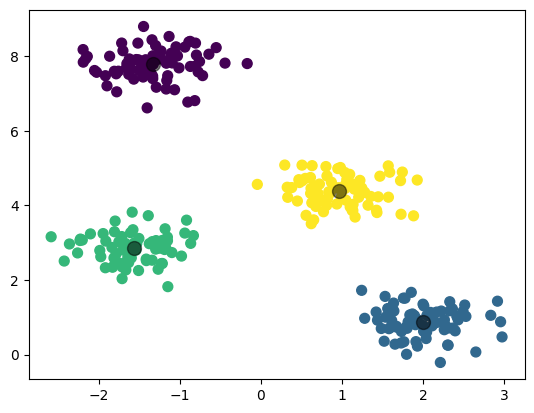

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_means = kmeans.predict(X)



import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X,n_clusters,rseed=2):
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters]
    centers =X[i]

    while True:
        labels = pairwise_distances_argmin(X,centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers==new_centers):
            break
        centers=new_centers
    return centers,labels    
centers,labels =find_clusters(X,4)   
plt.scatter(X[:,0],X[:,1] , s=50 , cmap='viridis' , c=y_means)
plt.scatter(centers[:,0],centers[:,1] , s=100 , c='black' , alpha=0.5)
plt.show()